# TAD Pictures Productions 

In this notebook, we'll conduct data cleaning and filtering tasks across various datasets containing movie details spanning different years. Our objective is to explore the data and identify movies that are performing well in the box office.

In [7]:
#We import all the packages needed.
import pandas as pd
import numpy as np
import string
import matplotlib as plt 
import sqlite3
import zipfile
import seaborn as sns

In [3]:
#!pip install --upgrade pandas

In [4]:
#We read in all the data using Pandas and assigned them to their df variable respectively.
df = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")
#df2 = pd.read_csv("./zippedData/im.db.zip", encoding='utf-8')
df3 = pd.read_csv("./zippedData/rt.movie_info.tsv.gz", sep='\t')
df4 = pd.read_csv("./zippedData/rt.reviews.tsv.gz", encoding='latin-1', sep='\t', compression='gzip')
df5 = pd.read_csv("./zippedData/tmdb.movies.csv.gz")
df6 = pd.read_csv("./zippedData/tn.movie_budgets.csv.gz")

In [5]:
#We read in the sql datatables
conn = sqlite3.connect('./zippedData/im.db')

## Data Exploring

We start first looking into the sql data. 

In [6]:
#We looked at all the tables in the sql data
pd.read_sql(
'''
    SELECT * FROM sqlite_master ''', conn)

,type,name,tbl_name,rootpage,sql


## ADD CELLS LOOKING INTO MOVIEBASICS AND MOVIERATINGS

We decided to use the two tables movie_basics and movie_ratings and join them together to get the titles, start year, genres, averagerating, and numvotes for years in 2010 to 2018.

We then turned this joined table into a pandas dataframe.

In [205]:
#We executed the SQL query and stored the results in a pandas DataFrame
q1 = pd.read_sql('''
    SELECT mb.movie_id,
            mb.primary_title,
            mb.start_year,
            mb.genres,
            mr.averagerating,
            mr.numvotes
    FROM movie_basics as mb
    JOIN movie_ratings as mr
    ON mb.movie_id = mr.movie_id
    WHERE mb.start_year > 2008 AND mb.start_year < 2018
    AND mr.numvotes > 100000
    ORDER BY mr.averagerating DESC;
    ''', conn)

#We closed the database connection
conn.close()

# Now we have your SQL query result in a pandas DataFrame
print(q1)

      movie_id                     primary_title  start_year  \
0    tt5813916                   The Mountain II        2016   
1    tt1375666                         Inception        2010   
2    tt0816692                      Interstellar        2014   
3    tt1675434                  The Intouchables        2011   
4    tt2582802                          Whiplash        2014   
..         ...                               ...         ...   
576  tt1815862                       After Earth        2013   
577  tt1071875  Ghost Rider: Spirit of Vengeance        2011   
578  tt1502712                    Fantastic Four        2015   
579  tt0938283                The Last Airbender        2010   
580  tt2322441              Fifty Shades of Grey        2015   

                      genres  averagerating  numvotes  
0           Action,Drama,War            9.3    100568  
1    Action,Adventure,Sci-Fi            8.8   1841066  
2     Adventure,Drama,Sci-Fi            8.6   1299334  
3     B

## Next we look into the csv files / ADD CELLS LOOKING INTO ALL THE DF's

In [ ]:
df.head()

In [ ]:
df3.head()

In [ ]:
df4.head()

In [ ]:
df5.head()

In [ ]:
df6.head()

# Now we decided to only use q1, df, and df6

We decided to use q1,df, and df6 because they contained the titles, genres, studios, domestic profit, production budget, and release year.

These are the key columns we need to dig into our analysis.

## Data Cleaning

We first must clean up these three dataframes so that we can merge them properly.

We noticed that it would be best to merge these three dataframes on the movie titles column.

We first decide to takeout all the space and punctuation in the movie columns of each dataframe.

In [206]:
#We stripped the spaces and punctuations in the titles of the movies in q1

def strip_spaces_and_punctuation(value):
    if isinstance(value, str):
        translation_table = str.maketrans('', '', string.punctuation + ' ')
        return value.translate(translation_table)
    else:
        return value

#We applied the function to all values in the DataFrame
q1['primary_title'] = q1['primary_title'].apply(lambda x: strip_spaces_and_punctuation(x))
print(q1)


      movie_id                primary_title  start_year  \
0    tt5813916                TheMountainII        2016   
1    tt1375666                    Inception        2010   
2    tt0816692                 Interstellar        2014   
3    tt1675434              TheIntouchables        2011   
4    tt2582802                     Whiplash        2014   
..         ...                          ...         ...   
576  tt1815862                   AfterEarth        2013   
577  tt1071875  GhostRiderSpiritofVengeance        2011   
578  tt1502712                FantasticFour        2015   
579  tt0938283             TheLastAirbender        2010   
580  tt2322441            FiftyShadesofGrey        2015   

                      genres  averagerating  numvotes  
0           Action,Drama,War            9.3    100568  
1    Action,Adventure,Sci-Fi            8.8   1841066  
2     Adventure,Drama,Sci-Fi            8.6   1299334  
3     Biography,Comedy,Drama            8.5    677343  
4          

In [207]:
#We stripped the spaces and punctuations in the titles of the movies in df
def strip_spaces_and_punctuation(value):
    if isinstance(value, str):
        translation_table = str.maketrans('', '', string.punctuation + ' ')
        return value.translate(translation_table)
    else:
        return value

#We applied the function to all values in the DataFrame
df['title'] = df['title'].apply(lambda x: strip_spaces_and_punctuation(x))
print(df)

                                     title      studio  domestic_gross  \
0                                ToyStory3          BV     415000000.0   
1                    AliceinWonderland2010          BV     334200000.0   
2     HarryPotterandtheDeathlyHallowsPart1          WB     296000000.0   
3                                Inception          WB     292600000.0   
4                        ShrekForeverAfter        P/DW     238700000.0   
...                                    ...         ...             ...   
3382                              TheQuake       Magn.          6200.0   
3383                 EdwardII2018rerelease          FM          4800.0   
3384                               ElPacto        Sony          2500.0   
3385                               TheSwan  Synergetic          2400.0   
3386                       AnActorPrepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3  

In [208]:
#We stripped the spaces and punctuations in the titles of the movies in df6
def strip_spaces_and_punctuation(value):
    if isinstance(value, str):
        translation_table = str.maketrans('', '', string.punctuation + ' ')
        return value.translate(translation_table)
    else:
        return value

#Apply the function to all values in the DataFrame
df6['movie'] = df6['movie'].apply(lambda x: strip_spaces_and_punctuation(x))
print(df6)

      id  release_date                                 movie  \
0      1  Dec 18, 2009                                Avatar   
1      2  May 20, 2011  PiratesoftheCaribbeanOnStrangerTides   
2      3   Jun 7, 2019                           DarkPhoenix   
3      4   May 1, 2015                   AvengersAgeofUltron   
4      5  Dec 15, 2017             StarWarsEpVIIITheLastJedi   
...   ..           ...                                   ...   
5777  78  Dec 31, 2018                                 Red11   
5778  79   Apr 2, 1999                             Following   
5779  80  Jul 13, 2005              ReturntotheLandofWonders   
5780  81  Sep 29, 2015                     APlagueSoPleasant   
5781  82   Aug 5, 2005                        MyDateWithDrew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,875  $1,045,663,875  
2         $350,000,000    $42,762,350    $149,762,350  
3      

Now that we stripped the spaces and puncatation in each dataframe movie columns, we now need to rename each column as the same name 'movie'.

In [ ]:
#We renamed the 'primary_title' and 'title' to just 'movie' in q1 and df

q1.rename(columns={'primary_title': 'movie'}, inplace=True)
df.rename(columns={'title': 'movie'}, inplace=True)

Next we noticed that some titles of the movies are spelled a little differently in q1 and df6. We decided to make these titles name the same so that they merge properly because they are huge movies in the dataframes.

In [ ]:
#We changed the names of these movies to match the same for merge purposes
df6['movie'] = df6['movie'].replace('StarWarsEpVIIITheLastJedi', 'StarWarsTheLastJedi')
df6['movie'] = df6['movie'].replace('StarWarsEpVIITheForceAwakens', 'StarWarsTheForceAwakens')
q1['movie'] = q1['movie'].replace('StarWarsEpisodeVIITheForceAwakens', 'StarWarsTheForceAwakens')

In [209]:
#We looked at the tiles that contain 'Trans' in q1 
q1[q1['primary_title'].str.contains('Trans')]

,movie_id,primary_title,start_year,genres,averagerating,numvotes
244,tt0837562,HotelTransylvania,2012,"Animation,Comedy,Family",7.1,204571
470,tt2209764,Transcendence,2014,"Action,Drama,Sci-Fi",6.3,204481
487,tt1399103,TransformersDarkoftheMoon,2011,"Action,Adventure,Sci-Fi",6.2,366409
551,tt2109248,TransformersAgeofExtinction,2014,"Action,Adventure,Sci-Fi",5.7,283486
572,tt3371366,TransformersTheLastKnight,2017,"Action,Adventure,Sci-Fi",5.2,119007


Now we need to filter q1 and df6 to the years of 2010 to 2018 since df is already filtered to those dates.

In [210]:
#We turned the 'release_dates' to datetime for df6 and then filtered for dates from 2010 to 2018
df6['release_date'] = pd.to_datetime(df6['release_date'])
df6 = df6.loc[(df6['release_date'] >= '2010-01-01') & (df6['release_date'] <= '2018-12-31')]

In [211]:
#We filtered for dates from 2010 to 2018 in q1
q1 = q1.loc[(q1['start_year'] >= 2008) & (q1['start_year'] <= 2018)]
q1['start_year'].value_counts()

start_year
2013    94
2011    83
2014    81
2012    73
2010    72
2016    69
2015    58
2017    51
Name: count, dtype: int64

# Merging the Dataframes

Now that we have each dataframe filtered for 2010 to 2018 and the 'movie' columns the same, we can now merge each together to create one dataframe.

In [243]:
#We merged the df6 to q1 on the 'movie' column
merged_df6_q1 = df6.merge(q1, how='left', on='movie')
merged_df6_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2124 non-null   int64         
 1   release_date       2124 non-null   datetime64[ns]
 2   movie              2124 non-null   object        
 3   production_budget  2124 non-null   object        
 4   domestic_gross     2124 non-null   object        
 5   worldwide_gross    2124 non-null   object        
 6   movie_id           526 non-null    object        
 7   start_year         526 non-null    float64       
 8   genres             526 non-null    object        
 9   averagerating      526 non-null    float64       
 10  numvotes           526 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 182.7+ KB


In [244]:
#We merged the 'merged_df6_q1' to df on the 'movie' column
merged_df6_q1_df = merged_df6_q1.merge(df, how='left', on='movie')

In [245]:
merged_df6_q1_df.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,movie_id,start_year,genres,averagerating,numvotes,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,PiratesoftheCaribbeanOnStrangerTides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,2011.0,"Action,Adventure,Fantasy",6.6,447624.0,BV,241100000.0,804600000,2011.0
1,4,2015-05-01,AvengersAgeofUltron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,2015.0,"Action,Adventure,Sci-Fi",7.3,665594.0,BV,459000000.0,946400000,2015.0
2,5,2017-12-15,StarWarsTheLastJedi,"$317,000,000","$620,181,382","$1,316,721,747",tt2527336,2017.0,"Action,Adventure,Fantasy",7.1,462903.0,BV,620200000.0,712400000,2017.0
3,6,2015-12-18,StarWarsTheForceAwakens,"$306,000,000","$936,662,225","$2,053,311,220",tt2488496,2015.0,"Action,Adventure,Fantasy",8.0,784780.0,BV,936700000.0,"1,131.6",2015.0
4,7,2018-04-27,AvengersInfinityWar,"$300,000,000","$678,815,482","$2,048,134,200",NaN,NaN,NaN,NaN,NaN,BV,678800000.0,"1,369.5",2018.0


In [246]:
#We looked at the 'movie' column that contain 'StarWars' 
merged_df6_q1_df[merged_df6_q1_df['movie'].str.contains('StarWars')]

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,movie_id,start_year,genres,averagerating,numvotes,studio,domestic_gross_y,foreign_gross,year
2,5,2017-12-15,StarWarsTheLastJedi,"$317,000,000","$620,181,382","$1,316,721,747",tt2527336,2017.0,"Action,Adventure,Fantasy",7.1,462903.0,BV,620200000.0,712400000,2017.0
3,6,2015-12-18,StarWarsTheForceAwakens,"$306,000,000","$936,662,225","$2,053,311,220",tt2488496,2015.0,"Action,Adventure,Fantasy",8.0,784780.0,BV,936700000.0,"1,131.6",2015.0
8,12,2018-05-25,SoloAStarWarsStory,"$275,000,000","$213,767,512","$393,151,347",NaN,NaN,NaN,NaN,NaN,BV,213800000.0,179200000,2018.0
30,45,2016-12-16,RogueOneAStarWarsStory,"$200,000,000","$532,177,324","$1,049,102,856",tt3748528,2016.0,"Action,Adventure,Sci-Fi",7.8,478592.0,BV,532200000.0,523900000,2016.0


Now that we have merged our data, we can now drop the unnecessary columns. 

In [247]:
#We dropped the columns that wasn't necessary for our analysis 
merged_df6_q1_df.drop(columns=['averagerating', 'movie_id', 'movie_id', 'start_year', 'worldwide_gross', 'year', 'domestic_gross_y', 'numvotes'], inplace=True)

merged_df6_q1_df.head()

,id,release_date,movie,production_budget,domestic_gross_x,genres,studio,foreign_gross
0,2,2011-05-20,PiratesoftheCaribbeanOnStrangerTides,"$410,600,000","$241,063,875","Action,Adventure,Fantasy",BV,804600000
1,4,2015-05-01,AvengersAgeofUltron,"$330,600,000","$459,005,868","Action,Adventure,Sci-Fi",BV,946400000
2,5,2017-12-15,StarWarsTheLastJedi,"$317,000,000","$620,181,382","Action,Adventure,Fantasy",BV,712400000
3,6,2015-12-18,StarWarsTheForceAwakens,"$306,000,000","$936,662,225","Action,Adventure,Fantasy",BV,"1,131.6"
4,7,2018-04-27,AvengersInfinityWar,"$300,000,000","$678,815,482",NaN,BV,"1,369.5"


Now we want to find the the domestic ROI and the domestic profits in the data.

First we must change our production_budget and domestic_gross_x into numerical values so that we can calculate the ROI and Profits.

In [248]:
#We stripped the '$' from the 'production_budget' and 'domestic_gross_x' column
merged_df6_q1_df['production_budget'] = merged_df6_q1_df['production_budget'].str.strip('$')
merged_df6_q1_df['domestic_gross_x'] = merged_df6_q1_df['domestic_gross_x'].str.strip('$')

#We stripped the commas and space from the 'production_budget' and 'domestic_gross_x' column
merged_df6_q1_df['production_budget'].replace(',', '', regex=True, inplace=True)
merged_df6_q1_df['domestic_gross_x'].replace(',', '', regex=True, inplace=True)

#We changed both these columns to numeric columns 
merged_df6_q1_df['production_budget'] = pd.to_numeric(merged_df6_q1_df['production_budget'], errors='coerce')
merged_df6_q1_df['domestic_gross_x'] = pd.to_numeric(merged_df6_q1_df['domestic_gross_x'], errors='coerce')


/var/folders/vf/_ggtcvh11slbnt8cr1ghjwxw0000gn/T/ipykernel_32945/578316501.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df6_q1_df['production_budget'].replace(',', '', regex=True, inplace=True)
/var/folders/vf/_ggtcvh11slbnt8cr1ghjwxw0000gn/T/ipykernel_32945/578316501.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [ ]:
#We calculated the ROI and the profits of the datasets and made two new columns for each
merged_df6_q1_df['domestic_ROI_percent'] = ((merged_df6_q1_df['domestic_gross_x']) / (merged_df6_q1_df['production_budget'])) * 100
merged_df6_q1_df['domestic_Profit'] = (merged_df6_q1_df['domestic_gross_x']) - (merged_df6_q1_df['production_budget'])

Now we look back at our new dataframe with the dropped columns and added columns. 

We notice a couple key movies are missing either the 'genres' or the 'studio'. We used common knowledge of these films to put the in their correct 'genres' or 'studio'.

In [317]:
merged_df6_q1_df.loc[8, 'genres'] = 'Action,Adventure,Sci-Fi'
merged_df6_q1_df.loc[4, 'genres'] = 'Action,Adventure,Sci-Fi'
merged_df6_q1_df.loc[251, 'genres'] = 'Action,Adventure,Sci-Fi'
merged_df6_q1_df.loc[251, 'studio'] = 'Sony'
merged_df6_q1_df.loc[165, 'genres'] = 'Adventure,Drama,Fantasy'
merged_df6_q1_df.loc[167, 'genres'] = 'Adventure,Drama,Fantasy'
merged_df6_q1_df.loc[165, 'studio'] = 'WB'
merged_df6_q1_df.loc[167, 'studio'] = 'WB'
merged_df6_q1_df.loc[28, 'genres'] = 'Action,Adventure,Sci-Fi'
merged_df6_q1_df.loc[35, 'studio'] = 'BV'
merged_df6_q1_df.loc[25, 'studio'] = 'Sony'
merged_df6_q1_df.loc[19, 'studio'] = 'BV'
merged_df6_q1_df.loc[38, 'studio'] = 'BV'

In [371]:
#We drop the 'id' column
merged_df6_q1_df.drop(columns=['id'], inplace=True)

In [373]:
#We renamed 'domestic_gross_x' to 'domestic_gross'
merged_df6_q1_df.rename(columns={'domestic_gross_x': 'domestic_gross'}, inplace=True)

# Not really needed

In [386]:
#We stored all the NaN values in the 'genres' and 'studio' columns in the merged_df6_q1_df dataframe and stored them into a new variables
nan_values = merged_df6_q1_df['genres'].isna()
nan_values_studio = merged_df6_q1_df['studio'].isna()

#We then filtered the DataFrame to display rows with NaN values in any column
df_with_nan = merged_df6_q1_df[nan_values]
df_with_nan_studio = merged_df6_q1_df[nan_values_studio]
df_with_nan_studio.head(40)

,release_date,movie,production_budget,domestic_gross,genres,studio,foreign_gross,domestic_ROI_percent,domestic_Profit
45,2010-05-28,PrinceofPersiaSandsofTime,200000000,90759676,NaN,NaN,NaN,45.379838,-109240324
47,2017-06-09,TheMummy,195000000,80101125,"Action,Adventure,Fantasy",NaN,NaN,41.077500,-114898875
52,2013-05-10,TheGreatGatsby,190000000,144840419,"Drama,Romance",NaN,NaN,76.231799,-45159581
61,2016-11-18,FantasticBeastsandWheretoFindThem,180000000,234037575,"Adventure,Family,Fantasy",NaN,NaN,130.020875,54037575
66,2018-07-27,MissionImpossibleâFallout,178000000,220159104,NaN,NaN,NaN,123.684890,42159104
70,2016-04-15,TheJungleBook,175000000,364001123,"Adventure,Drama,Family",NaN,NaN,208.000642,189001123
75,2018-11-21,RalphBreaksTheInternet,175000000,201091711,NaN,NaN,NaN,114.909549,26091711
94,2011-07-29,CowboysandAliens,163000000,100368560,NaN,NaN,NaN,61.575804,-62631440
95,2017-03-17,BeautyandtheBeast,160000000,504014165,"Family,Fantasy,Musical",NaN,NaN,315.008853,344014165
99,2013-05-24,FastandFurious6,160000000,238679850,NaN,NaN,NaN,149.174906,78679850


In [ ]:
merged_df6_q1_df.info()

# Visualization 

Now that our data is cleaned and fitlered, we can now visualize our analysis for a better observation.

We first want to look at the top 25 studios who has the highest 'domestic_gross'

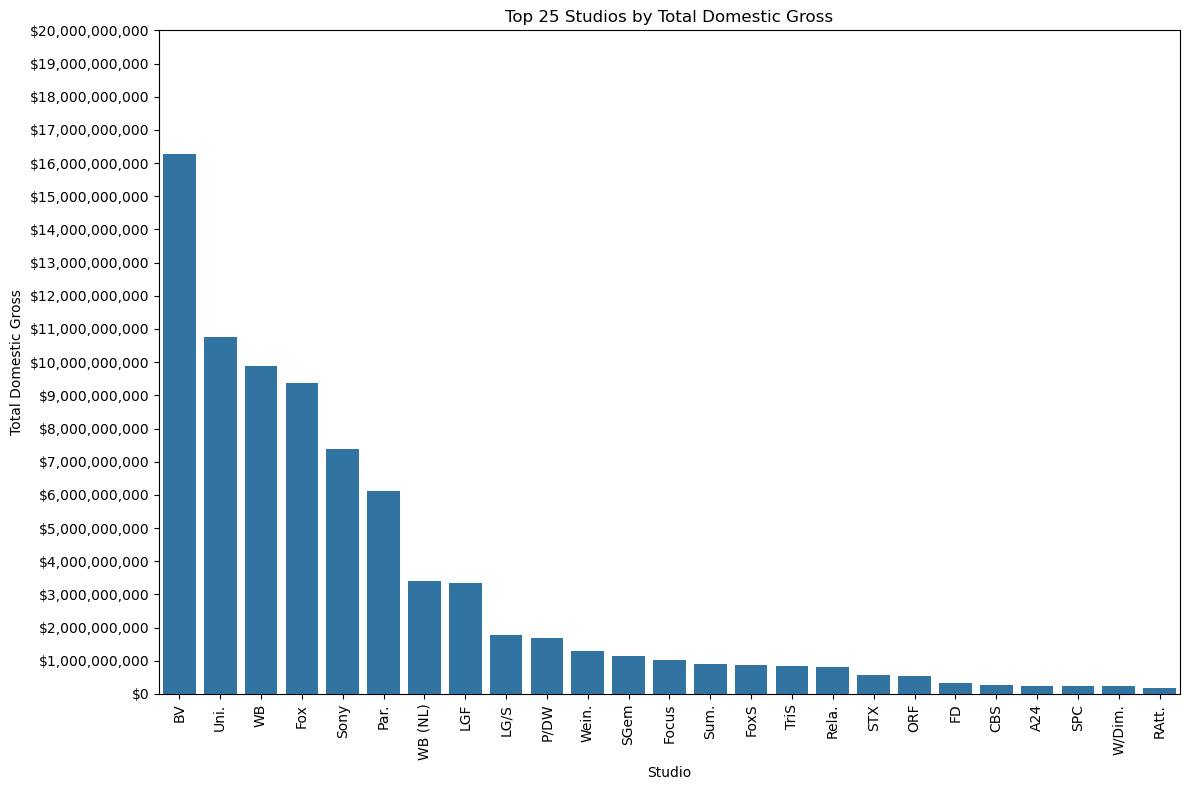

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 25 studios by domestic gross
top_studios_merged = merged_df6_q1_df.groupby('studio')['domestic_gross_x'].sum().nlargest(25).index

# Filter the DataFrame to include only the top 25 studios
df_top_25_merged = merged_df6_q1_df[merged_df6_q1_df['studio'].isin(top_studios_merged)]

# Calculate the total domestic gross for each studio
total_domestic_gross_merged = df_top_25_merged.groupby('studio')['domestic_gross_x'].sum().reset_index()

# Sort the studios based on their total domestic gross
sorted_studios_merged = total_domestic_gross_merged.sort_values(by='domestic_gross_x', ascending=False)['studio']

# Create a bar plot with studios ordered from greatest to least
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='studio', y='domestic_gross_x', data=df_top_25_merged, estimator=sum, errorbar=None, order=sorted_studios_merged)
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross')
plt.title('Top 25 Studios by Total Domestic Gross')
plt.xticks(rotation=90)

# Set the y-axis tick labels from 0 to 25,000,000,000
y_ticks = range(0, 20000000001, 1000000000)
barplot.set_yticks(y_ticks)
barplot.set_yticklabels(['${:,.0f}'.format(ytick) for ytick in y_ticks])

# Add text labels with each bar's value
#for index, row in total_domestic_gross.iterrows():
    #barplot.text(index, row['domestic_gross'], '${:,.0f}'.format(row['domestic_gross']), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Now we look at the top 25 studios with the highest 'domestic_ROI_percent'.

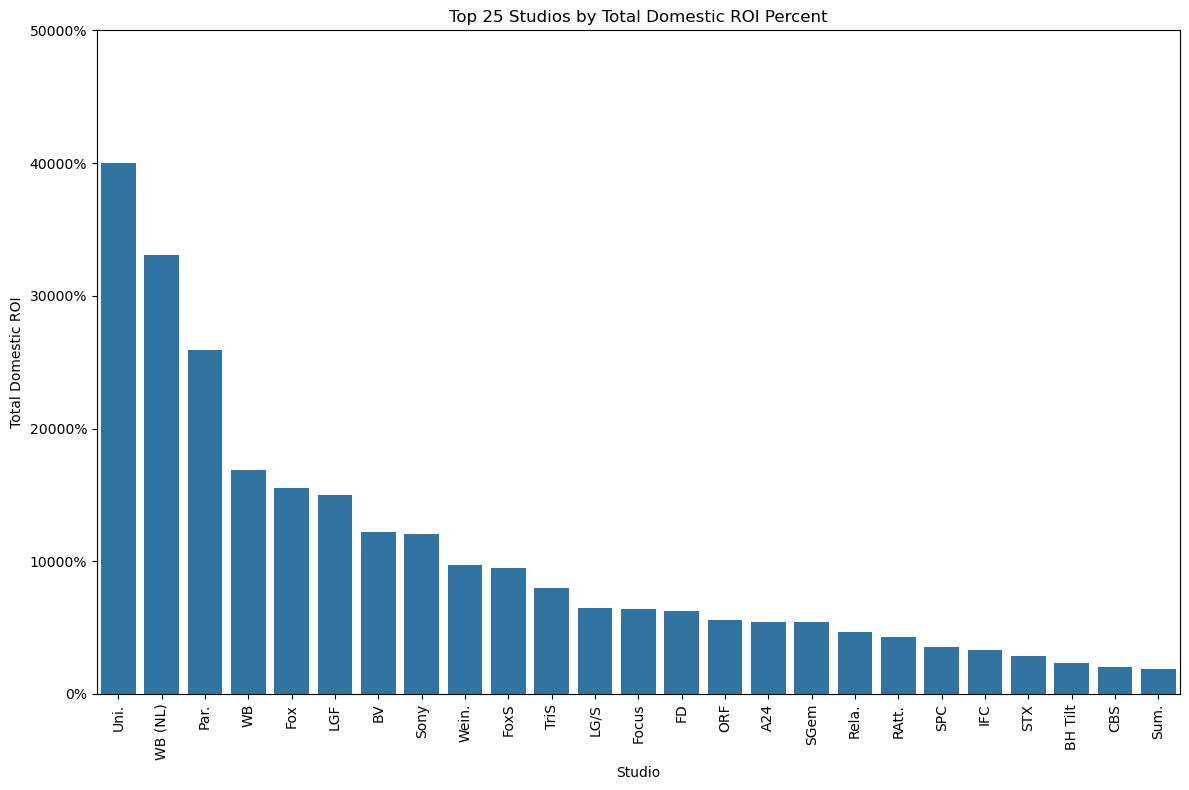

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 25 studios by domestic ROI
top_studios_merged_ROI = merged_df6_q1_df.groupby('studio')['domestic_ROI_percent'].sum().nlargest(25).index

# Filter the DataFrame to include only the top 25 studios
df_top_25_merged_ROI = merged_df6_q1_df[merged_df6_q1_df['studio'].isin(top_studios_merged_ROI)]

# Calculate the total domestic ROI for each studio
total_domestic_ROI_merged_ROI = df_top_25_merged_ROI.groupby('studio')['domestic_ROI_percent'].sum().reset_index()

# Sort the studios based on their total domestic ROI
sorted_studios_merged_ROI = total_domestic_ROI_merged_ROI.sort_values(by='domestic_ROI_percent', ascending=False)['studio']

# Create a bar plot with studios ordered from greatest to least
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='studio', y='domestic_ROI_percent', data=df_top_25_merged_ROI, estimator=sum, errorbar=None, order=sorted_studios_merged_ROI)
plt.xlabel('Studio')
plt.ylabel('Total Domestic ROI')
plt.title('Top 25 Studios by Total Domestic ROI Percent')
plt.xticks(rotation=90)

# Set the y-axis tick labels from 0 to 500 with increments of 500%
plt.yticks(range(0, 50001, 10000), ['{}%'.format(i) for i in range(0, 50001, 10000)])

plt.tight_layout()
plt.show()


Then we looked at the top 25 studios with 'domestic_Profit'.

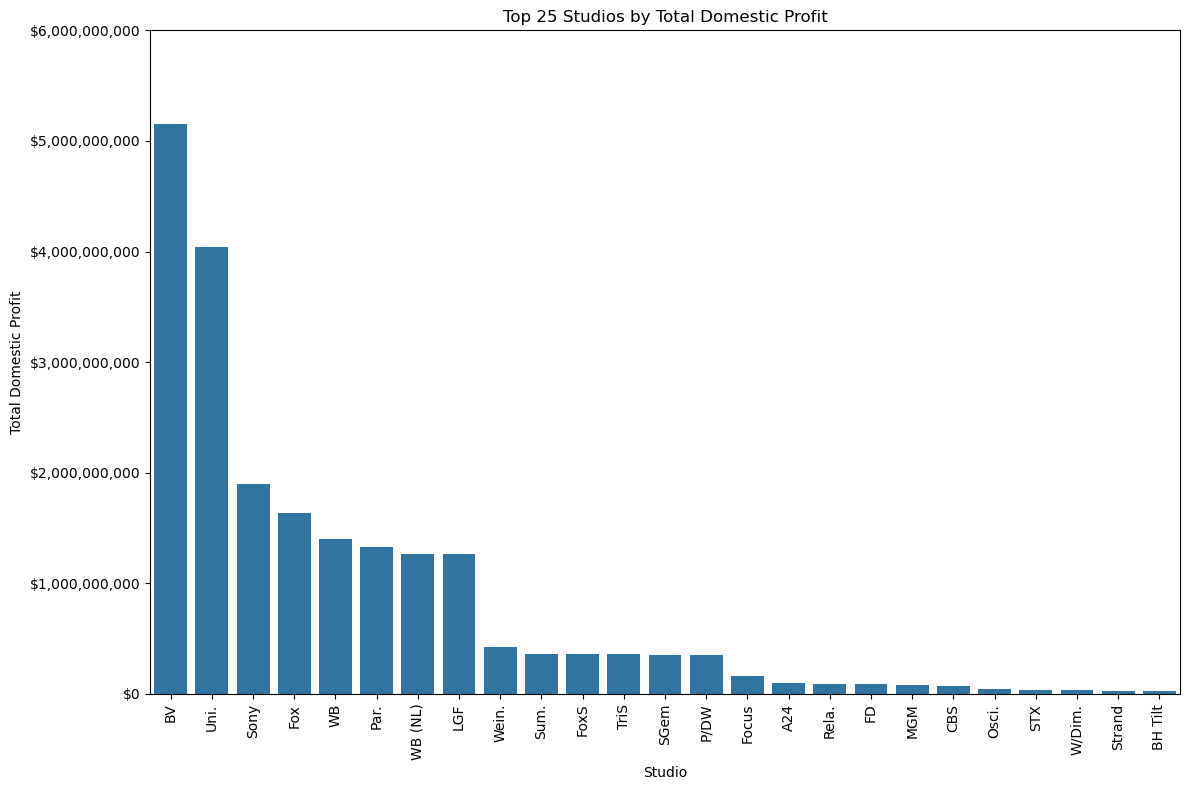

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 25 studios by domestic ROI
top_studios_merged_profit = merged_df6_q1_df.groupby('studio')['domestic_Profit'].sum().nlargest(25).index

# Filter the DataFrame to include only the top 25 studios
df_top_25_merged_profit = merged_df6_q1_df[merged_df6_q1_df['studio'].isin(top_studios_merged_profit)]

# Calculate the total domestic ROI for each studio
total_domestic_ROI_merged_profit = df_top_25_merged_profit.groupby('studio')['domestic_Profit'].sum().reset_index()

# Sort the studios based on their total domestic ROI
sorted_studios_merged_profit = total_domestic_ROI_merged_profit.sort_values(by='domestic_Profit', ascending=False)['studio']

# Create a bar plot with studios ordered from greatest to least
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='studio', y='domestic_Profit', data=df_top_25_merged_profit, estimator=sum, errorbar=None, order=sorted_studios_merged_profit)
plt.xlabel('Studio')
plt.ylabel('Total Domestic Profit')
plt.title('Top 25 Studios by Total Domestic Profit')
plt.xticks(rotation=90)

# Set the y-axis tick labels from 0 to 25,000,000,000
y_ticks = range(0, 6000000001, 1000000000)
barplot.set_yticks(y_ticks)
barplot.set_yticklabels(['${:,.0f}'.format(ytick) for ytick in y_ticks])

plt.tight_layout()
plt.show()


Last we look at the top 25 'genres' with the highest 'domestic_Profit'

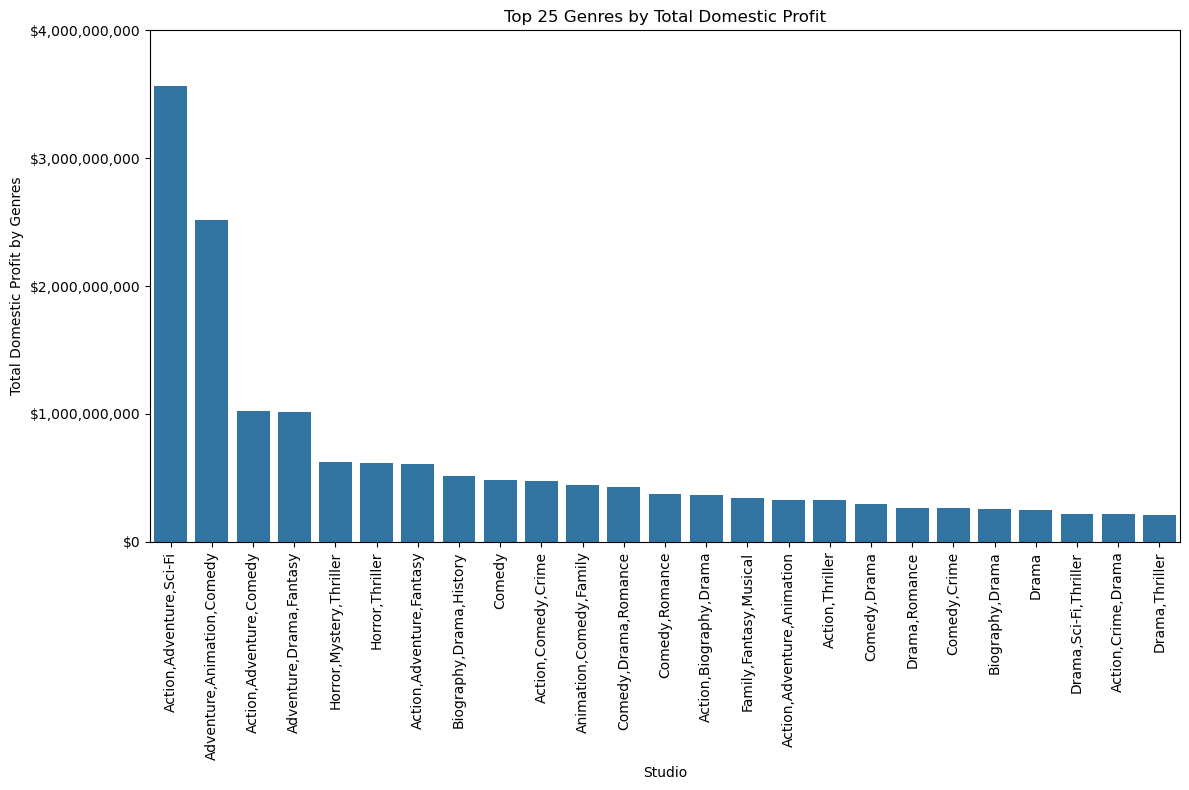

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 25 genre by domestic ROI
top_genre_merged_profit = merged_df6_q1_df.groupby('genres')['domestic_Profit'].sum().nlargest(25).index

# Filter the DataFrame to include only the top 25 studios
df_top_25_merged_genre_profit = merged_df6_q1_df[merged_df6_q1_df['genres'].isin(top_genre_merged_profit)]

# Calculate the total domestic ROI for each studio
total_genre_merged_profit = df_top_25_merged_genre_profit.groupby('genres')['domestic_Profit'].sum().reset_index()

# Sort the studios based on their total domestic ROI
sorted_genre_merged_profit = total_genre_merged_profit.sort_values(by='domestic_Profit', ascending=False)['genres']

# Create a bar plot with studios ordered from greatest to least
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='genres', y='domestic_Profit', data=df_top_25_merged_genre_profit, estimator=sum, errorbar=None, order=sorted_genre_merged_profit)
plt.xlabel('Studio')
plt.ylabel('Total Domestic Profit by Genres')
plt.title('Top 25 Genres by Total Domestic Profit')
plt.xticks(rotation=90)

# Set the y-axis tick labels from 0 to 25,000,000,000
y_ticks = range(0, 4000000001, 1000000000)
barplot.set_yticks(y_ticks)
barplot.set_yticklabels(['${:,.0f}'.format(ytick) for ytick in y_ticks])

plt.tight_layout()
plt.show()


In [367]:
#joining tables and looking at the movies with the top number of votes
# should we create a metric for this? ie looking for movies with at least 1,000 votes?

pd. read_sql(
    '''SELECT * 
    FROM movie_basics as mb
    JOIN movie_ratings as mr
    ON mb.movie_id = mr.movie_id
    ORDER BY numvotes DESC
    LIMIT 10 ''', conn)

ProgrammingError: Cannot operate on a closed database.

## Df1 - from [Box Office Mojo](https://www.boxofficemojo.com/)

In [136]:
# looking at the top 15 studios that appear in the dataset
df['studio'].value_counts().head(15)

studio
IFC       166
Uni.      147
WB        140
Magn.     136
Fox       136
SPC       123
Sony      109
BV        106
LGF       102
Par.      101
Eros       89
Wein.      77
CL         73
Strand     68
FoxS       66
Name: count, dtype: int64

In [137]:
# sorting by the movies that have the highest domestic_gross earnings
df.sort_values(['domestic_gross'], ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


## Df5 - from [TheMovieDB](https://www.themoviedb.org/)

a note on the 'popularity' metric: https://developer.themoviedb.org/docs/popularity-and-trending

genre id:</p> MOVIE

Action          28 
Adventure       12 
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37

taken from https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

## Df6 - from [The Numbers](https://www.the-numbers.com/)

In [138]:
df6.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [139]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [140]:
# Replace commas with an empty string
df6['domestic_gross'].replace(',', '', regex=True, inplace=True)

# Strip dollar sign from the beginning of each value
df6['domestic_gross_int'] = df6['domestic_gross'].str.strip('$')

# Convert the 'domestic_gross_int' column to numeric
df6['domestic_gross_int'] = pd.to_numeric(df6['domestic_gross_int'], errors='coerce')

# Display the data types of the columns after conversion
print(df6.dtypes)

id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
domestic_gross_int     int64
dtype: object


/var/folders/vf/_ggtcvh11slbnt8cr1ghjwxw0000gn/T/ipykernel_30117/606124998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df6['domestic_gross'].replace(',', '', regex=True, inplace=True)


In [141]:
# Replace commas with an empty string
df6['production_budget'].replace(',', '', regex=True, inplace=True)

# Strip dollar sign from the beginning of each value
df6['production_budget'] = df6['production_budget'].str.strip('$')

# Convert the 'domestic_gross_int' column to numeric
df6['production_budget_int'] = pd.to_numeric(df6['production_budget'], errors='coerce')

# Display the data types of the columns after conversion
print(df6.dtypes)

id                        int64
release_date             object
movie                    object
production_budget        object
domestic_gross           object
worldwide_gross          object
domestic_gross_int        int64
production_budget_int     int64
dtype: object


/var/folders/vf/_ggtcvh11slbnt8cr1ghjwxw0000gn/T/ipykernel_30117/3834121833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df6['production_budget'].replace(',', '', regex=True, inplace=True)


In [393]:
merged_df6_q1_df.to_csv('masterdf.csv', index=False)